# Relatorios sobre o banco de dados


## Instalando algumas bibliotecas nescessárias

In [3]:
!pip install seaborn
!pip install psycopg2
!pip install pandas

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Importando bibliotecas 

In [24]:
import pandas as pd
import seaborn as sns
import psycopg2


## Criando conexão

In [3]:
conn = psycopg2.connect(host = 'localhost',database='TransportePereciveis',user='postgres',password='123456')

## Verificando conexão

In [8]:
conn

<connection object at 0x000001D3B2125678; dsn: 'user=postgres password=xxx dbname=TransportePereciveis host=localhost', closed: 0>

## Relatório de entregas em data

### Objetivo: Saber quais entregas foram feitas em qual data e pra quem.

#### código:

In [11]:
resultado = pd.read_sql_query(""" select cliente.id,nomeficticio,dataentrega,numerobandas from cliente
                                  inner join _pedido
                                  on(cliente.id = _pedido.id);
""",conn)

#### Imprimindo resultado:

In [10]:
resultado

,id,nomeficticio,dataentrega,numerobandas
0,1,Ronaldo Pereira,2018-11-29,30
1,2,Edmundo Souza,2018-11-28,40
2,3,Mauricio Neto,2018-11-24,35
3,4,Nelson Cristo,2018-11-30,70
4,5,Luis Pinto,2018-11-25,15


## Relatório de empresas por município

### Objetivo: Saber onde residem as empresas.

#### Código:

In [9]:
resultado2= pd.read_sql_query("""select nomeficticio as cliente,concat(logradouro.descricao,' ',endereco.nome,',',endereco.numero,',',bairro.nome,' - ',cidade.nome)as Endereco from cliente
inner join endereco
on(cliente.id = endereco.fk_cliente_id)
inner join logradouro
on(logradouro.id = endereco.fk_logradouro_id)
inner join compoe
on(endereco.id = compoe.fk_endereco_id)
inner join bairro
on(compoe.fk_bairro_id = bairro.id)
inner join cidade
on(bairro.fk_cidade_id = cidade.id);
 """,conn)

####  Imprimindo resultado

In [10]:
resultado2

,cliente,endereco
0,Ronaldo Pereira,"Avenida Maruipe,774,Manguinhos - Serra"
1,Edmundo Souza,"Escadaria Paulina Maria de Souza,71,tabuazeiro..."
2,Mauricio Neto,"Rua Mario Lopes,25,São Pedro - Vitoria"
3,Nelson Cristo,"Rua Vitoria,33,Serra Dourada - Serra"
4,Luis Pinto,"Avenida Fernando Ferrari,54,Goiabeiras - Vitoria"


## Relatorio de vendas

### Objetivo: saber a quantidade de vendas de cada funcionário


####  Código: 


In [14]:
result3 = pd.read_sql_query("""
select nome,sum(numeroBandas) as Total_de_Vendas from _pedido
inner join funcionario
on(_pedido.fk_Funcionario_IDFuncionario = funcionario.idfuncionario)
group by funcionario.nome;

""",conn)

#### Imprimindo resultado

In [48]:
result3

,nome,total_de_vendas
0,Gabriel,120
1,Renata,70


#### Gerando gráfico:

In [10]:
df = pd.DataFrame(result3)
cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = tuple(df.nome)
y_pos = np.arange(len(objects))
performance = list(df.total_de_vendas)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Numero de Vendas')
plt.title('Vendas de banda de porco')
 
plt.show()

NameError: name 'result3' is not defined

## Relatorio de frota(não tem nada a ver com o alexandre)

### Objetivo: Saber quantos automóveis refrigerados e não refrigerados a empresa possui

#### Código:

In [16]:
result4 = pd.read_sql_query("""select isrefrigerado as refrigerado,count(isrefrigerado)as numero_de_automoveis from automovel
group by isrefrigerado;""",conn)

#### imprimindo resultado:

In [17]:
result4

,refrigerado,numero_de_automoveis
0,False,2
1,True,3


## Relatorio de Compras

### Objetivo: Saber quantas bandas de porco cada cliente comprou

#### Código:

In [4]:
result5 = pd.read_sql_query("""select nomeficticio as nome_cliente,sum(numeroBandas)as numeroBandas from _pedido
inner join cliente
on(cliente.id = _pedido.fk_cliente_id)
group by nomeficticio
order by numerobandas desc;""",conn)

#### Imprimindo o resultado:

In [46]:
result5

,nome_cliente,numerobandas
0,Nelson Cristo,70
1,Edmundo Souza,40
2,Mauricio Neto,35


#### Gerando gráfico: 

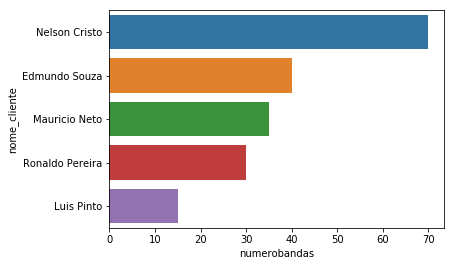

In [29]:
sns.barplot(x="numerobandas",y = "nome_cliente",data=df)